In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('C:/Users/abc/Desktop/Personal tracker/Personal tracker.csv')

In [6]:
print(df.head(30))

          Date        Category                 Description  Income  Expense
0   01/03/2023          Salary            Monthly paycheck  5500.0      NaN
1   01/03/2023            Rent       Studio apartment rent     NaN  1350.00
2   02/03/2023       Utilities            Electricity bill     NaN    98.75
3   04/03/2023         Grocery     Weekly supermarket trip     NaN   127.40
4   05/03/2023  Transportation          Monthly metro pass     NaN   120.00
5   08/03/2023       Insurance    Health insurance premium     NaN   245.50
6   10/03/2023   Entertainment        Netflix subscription     NaN    19.99
7   12/03/2023          Dining          Team lunch at work     NaN    35.50
8   15/03/2023         Grocery      Organic store purchase     NaN    89.90
9   17/03/2023   Personal Care          Haircut & grooming     NaN    45.00
10  19/03/2023        Shopping              New work shoes     NaN    89.99
11  22/03/2023          Travel   Train tickets to hometown     NaN   175.00
12  25/03/20

In [55]:
df['Date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df['Income'] = df['income'].fillna(0)
df['Expense'] = df['expense'].fillna(0)

print(df.head())

        date        category              description  income  expense  \
0 2023-03-01          Salary         Monthly paycheck  5500.0     0.00   
1 2023-03-01            Rent    Studio apartment rent     0.0  1350.00   
2 2023-03-02       Utilities         Electricity bill     0.0    98.75   
3 2023-03-04         Grocery  Weekly supermarket trip     0.0   127.40   
4 2023-03-05  Transportation       Monthly metro pass     0.0   120.00   

        Date  Income  Expense  
0 2023-03-01  5500.0     0.00  
1 2023-03-01     0.0  1350.00  
2 2023-03-02     0.0    98.75  
3 2023-03-04     0.0   127.40  
4 2023-03-05     0.0   120.00  


In [16]:
from sqlalchemy import create_engine

db_name = 'budget_tracker'
db_user = 'postgres'
db_password = 'Cigars&Coffee'
db_host = 'localhost'
db_port = '5432'

engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

with engine.connect() as conn:
    print("Connected successfully!")


Connected successfully!


In [20]:
df.columns = df.columns.str.lower()

In [21]:
print(df.head())

        date        category              description  income  expense
0 2023-03-01          Salary         Monthly paycheck  5500.0     0.00
1 2023-03-01            Rent    Studio apartment rent     0.0  1350.00
2 2023-03-02       Utilities         Electricity bill     0.0    98.75
3 2023-03-04         Grocery  Weekly supermarket trip     0.0   127.40
4 2023-03-05  Transportation       Monthly metro pass     0.0   120.00


In [22]:
df.to_sql('budget_data', engine, if_exists='append', index=False)


47

In [27]:
query = "SELECT * FROM budget_data ORDER BY date;"
df_all = pd.read_sql_query(query, engine)
print(df_all.head(15))


    id        date        category                description  income  expense
0    1  2023-03-01          Salary           Monthly paycheck  5500.0     0.00
1    2  2023-03-01            Rent      Studio apartment rent     0.0  1350.00
2    3  2023-03-02       Utilities           Electricity bill     0.0    98.75
3    4  2023-03-04         Grocery    Weekly supermarket trip     0.0   127.40
4    5  2023-03-05  Transportation         Monthly metro pass     0.0   120.00
5    6  2023-03-08       Insurance   Health insurance premium     0.0   245.50
6    7  2023-03-10   Entertainment       Netflix subscription     0.0    19.99
7    8  2023-03-12          Dining         Team lunch at work     0.0    35.50
8    9  2023-03-15         Grocery     Organic store purchase     0.0    89.90
9   10  2023-03-17   Personal Care         Haircut & grooming     0.0    45.00
10  11  2023-03-19        Shopping             New work shoes     0.0    89.99
11  12  2023-03-22          Travel  Train tickets to

In [29]:
query = """
SELECT 
SUM(income) AS total_income,
SUM(expense) AS total_expense,
SUM(income) - SUM(expense) AS total_balance
FROM budget_data;
"""
df_totals = pd.read_sql_query(query, engine)
print(df_totals)

   total_income  total_expense  total_balance
0       17200.0        10561.9         6638.1


In [39]:
query = """
SELECT
category,
SUM(expense) AS total_spent
FROM budget_data
WHERE expense > 0
GROUP BY category 
ORDER BY total_spent DESC;
"""
df_spending = pd.read_sql_query(query, engine)
print(df_spending)

          category  total_spent
0             Rent      4050.00
1         Shopping      1739.98
2          Grocery       749.00
3           Travel       625.00
4        Utilities       586.89
5      Investments       500.00
6   Transportation       450.60
7    Entertainment       422.49
8        Education       299.00
9        Insurance       245.50
10          Health       232.75
11             Car       189.95
12          Dining       149.25
13   Personal Care       134.00
14           Gifts       100.00
15         Charity        50.00
16   Subscriptions        24.99
17   Miscellaneous        12.50


In [34]:
query = """
SELECT 
    date,
    SUM(income) AS daily_income,
    SUM(expense) AS daily_expense
FROM budget_data
GROUP BY date
ORDER BY date;
"""

df_trend = pd.read_sql_query(query, engine)
print(df_trend)


          date  daily_income  daily_expense
0   2023-03-01        5500.0        1350.00
1   2023-03-02           0.0          98.75
2   2023-03-04           0.0         127.40
3   2023-03-05           0.0         120.00
4   2023-03-08           0.0         245.50
5   2023-03-10           0.0          19.99
6   2023-03-12           0.0          35.50
7   2023-03-15           0.0          89.90
8   2023-03-17           0.0          45.00
9   2023-03-19           0.0          89.99
10  2023-03-22           0.0         175.00
11  2023-03-25           0.0          62.30
12  2023-03-27           0.0         150.00
13  2023-03-29           0.0          65.00
14  2023-03-30           0.0          28.75
15  2023-04-01        5500.0        1350.00
16  2023-04-03           0.0          79.99
17  2023-04-05           0.0         210.25
18  2023-04-07           0.0          45.60
19  2023-04-09           0.0          85.00
20  2023-04-12           0.0         150.00
21  2023-04-15           0.0    

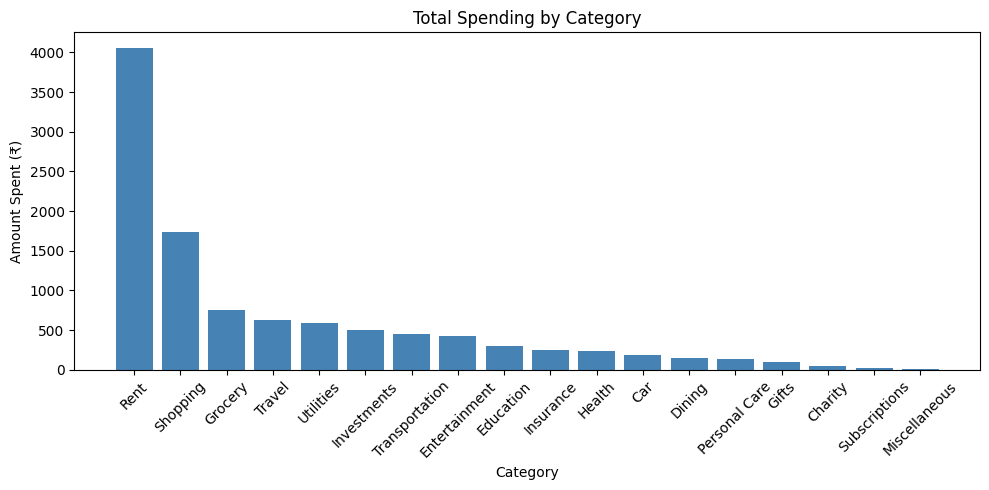

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(df_spending['category'], df_spending['total_spent'], color='steelblue')
plt.title('Total Spending by Category')
plt.xlabel('Category')
plt.ylabel('Amount Spent (₹)')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()




In [42]:
plt.savefig("Total_Spending_by_Category.png")


<Figure size 640x480 with 0 Axes>

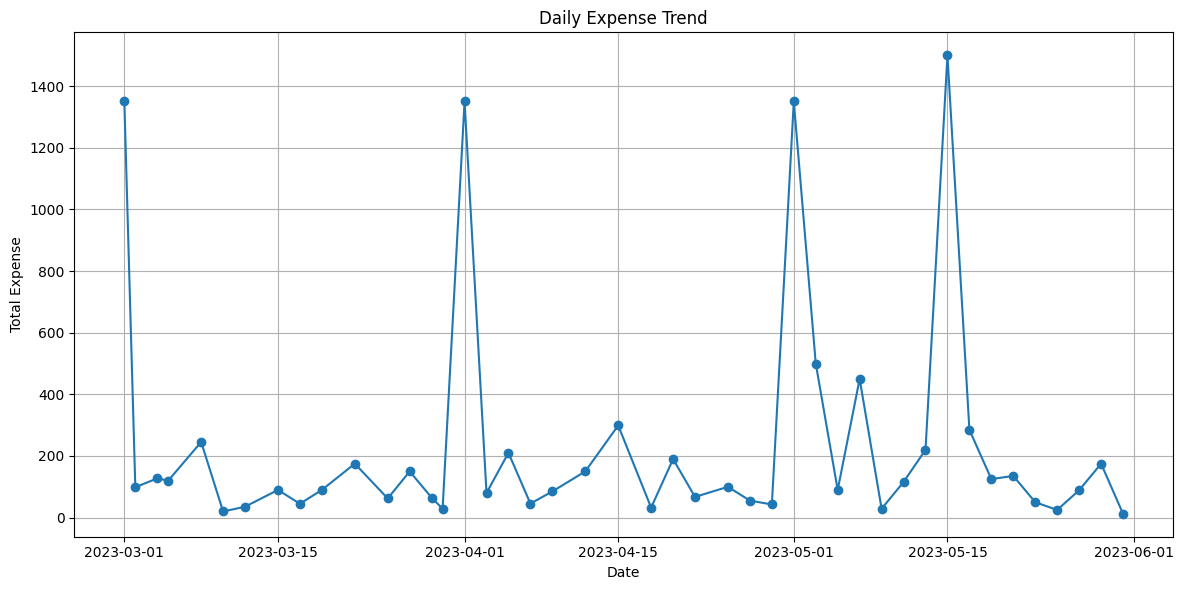

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(df_trend['date'], df_trend['daily_expense'], marker='o', linestyle='-')
plt.title('Daily Expense Trend')
plt.xlabel('Date')
plt.ylabel('Total Expense')
plt.grid(True)
plt.tight_layout()
plt.savefig('daily_expense_trend.png')
plt.show()

In [44]:
query = """
SELECT 
    DATE_TRUNC('week', date) AS week_start,
    SUM(expense) AS total_expense
FROM budget_data
WHERE expense > 0
GROUP BY week_start
ORDER BY week_start;
"""

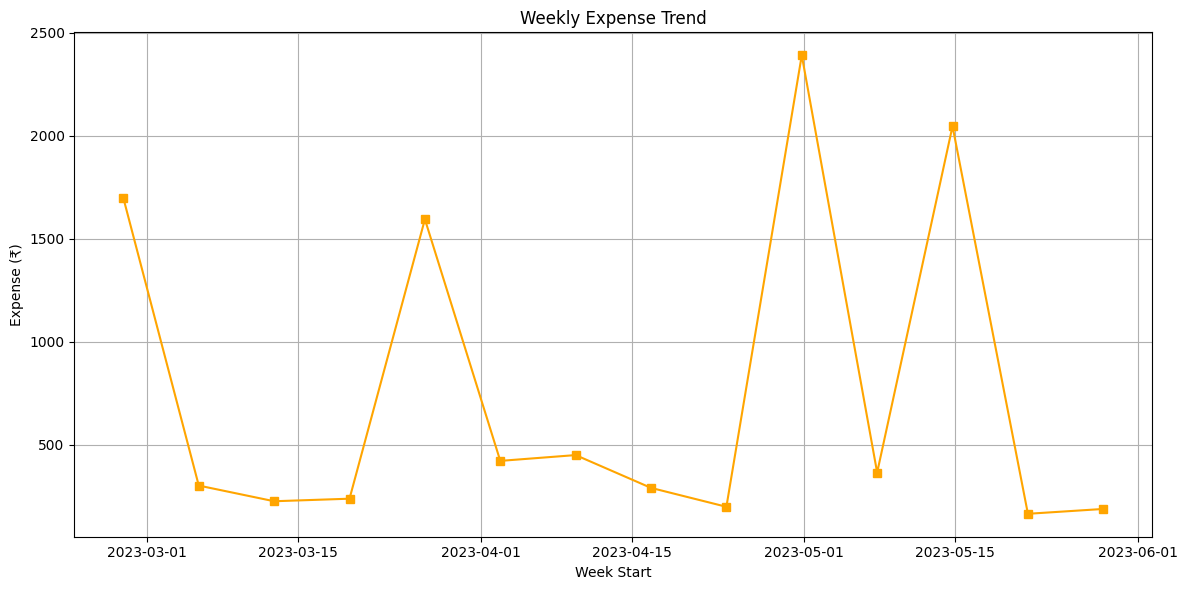

In [45]:
df_weekly = pd.read_sql_query(query, engine)
df_weekly['week_start'] = pd.to_datetime(df_weekly['week_start'])

plt.figure(figsize=(12, 6))
plt.plot(df_weekly['week_start'], df_weekly['total_expense'], marker='s', linestyle='-', color='orange')
plt.title('Weekly Expense Trend')
plt.xlabel('Week Start')
plt.ylabel('Expense (₹)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
query = """
SELECT 
    DATE_TRUNC('month', date) AS month,
    SUM(expense) AS total_expense
FROM budget_data
WHERE expense > 0
GROUP BY month
ORDER BY month;
"""

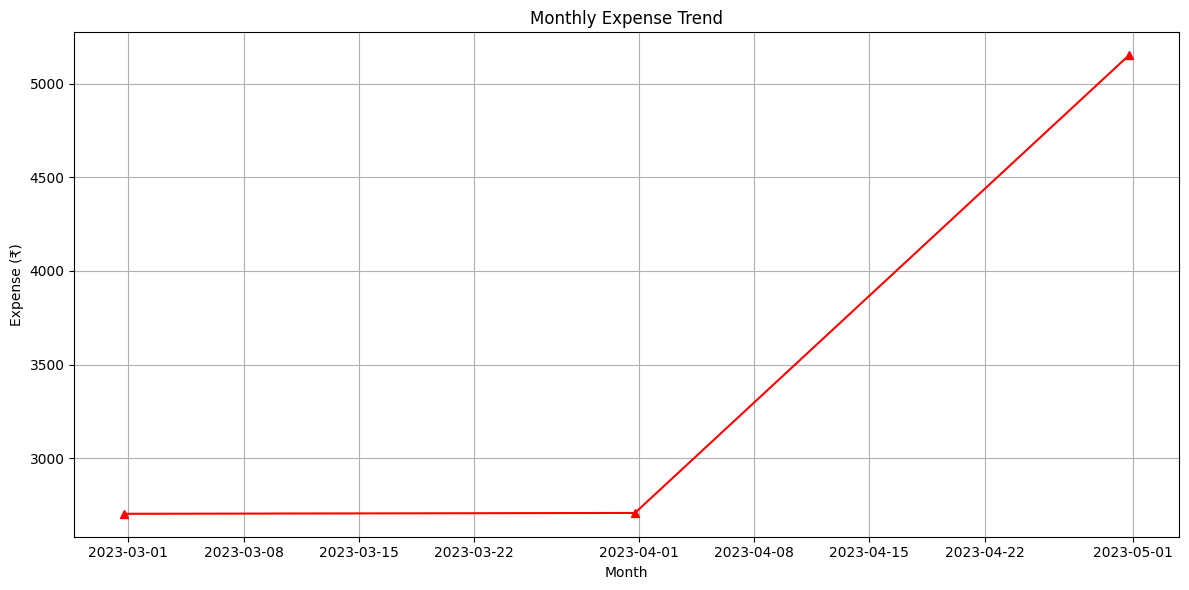

In [47]:
df_monthly = pd.read_sql_query(query, engine)
df_monthly['month'] = pd.to_datetime(df_monthly['month'])

plt.figure(figsize=(12, 6))
plt.plot(df_monthly['month'], df_monthly['total_expense'], marker='^', linestyle='-', color='red')
plt.title('Monthly Expense Trend')
plt.xlabel('Month')
plt.ylabel('Expense (₹)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
query = """
SELECT 
    DATE_TRUNC('month', date) AS month,
    SUM(income) AS total_income,
    SUM(expense) AS total_expense,
    ROUND(
        CASE 
            WHEN SUM(income) > 0 THEN (SUM(income) - SUM(expense)) / SUM(income)
            ELSE 0
        END, 4
    ) AS savings_rate
FROM budget_data
GROUP BY month
ORDER BY month;
"""
df_savings = pd.read_sql_query(query, engine)
df_savings['month'] = pd.to_datetime(df_savings['month'])
print(df_savings)


                      month  total_income  total_expense  savings_rate
0 2023-02-28 18:30:00+00:00        5500.0        2703.08        0.5085
1 2023-03-31 18:30:00+00:00        5500.0        2707.59        0.5077
2 2023-04-30 18:30:00+00:00        6200.0        5151.23        0.1692


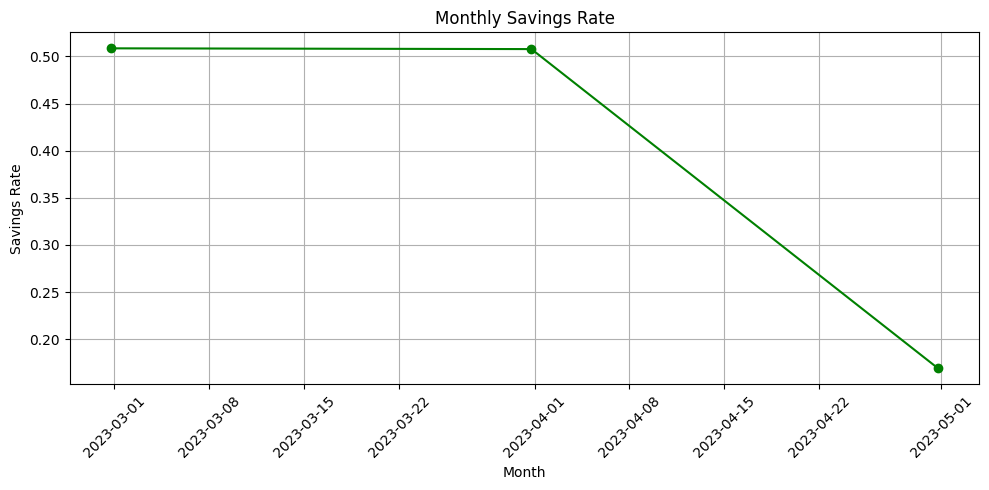

In [50]:
plt.figure(figsize=(10, 5))
plt.plot(df_savings['month'], df_savings['savings_rate'], marker='o', linestyle='-', color='green')
plt.title('Monthly Savings Rate')
plt.xlabel('Month')
plt.ylabel('Savings Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()